In [1]:
import sys
import os
import importlib

current_dir = os.getcwd()

project_root = os.path.abspath(os.path.join(current_dir, ".."))

if project_root not in sys.path:
    sys.path.append(project_root)

import files
importlib.reload(files)

import utils
importlib.reload(utils)

from files import *
from utils import *


In [2]:
"""
Fusion des DataFrames de Text pour chaque zone climatique : Toulouse , Zurich ,  Séville
Chaque groupe est combiné en un seul DataFrame par zone.
"""
Text_combined_tou = pd.concat([Text_agen, Text_albi,Text_auch,Text_toulouse], axis=0).reset_index(drop=True)
Text_combined_zur = pd.concat([Text_Birmensdorf,Text_Taenikon,Text_Zurich_fluntern,Text_Zurich_kloten], axis=0).reset_index(drop=True)
Text_combined_sev = pd.concat([Text_Cordoba, Text_Granada,Text_Malaga,Text_Sevilla], axis=0).reset_index(drop=True)


"""
Fusion des DataFrames de  Text et occupation  pour la  zone climatique : Toulouse
"""
occupation=extract_columns("../data/simulation_data/Occupancy_per_hour",1).reset_index(drop=True)  
Text_occ_agen = pd.concat([Text_agen,occupation],axis=1).reset_index(drop=True)
Text_occ_albi = pd.concat([Text_albi,occupation],axis=1).reset_index(drop=True)
Text_occ_auch = pd.concat([Text_auch,occupation],axis=1).reset_index(drop=True)
Text_occ_toulouse = pd.concat([Text_toulouse,occupation],axis=1).reset_index(drop=True)
Text_occ_combined_tou = pd.concat([Text_occ_agen, Text_occ_albi,Text_occ_auch,Text_occ_toulouse], axis=0).reset_index(drop=True)


"""
Fusion des DataFrames d ' humidite  pour la  zone climatique : Toulouse
"""
Hum_combined_tou = pd.concat([hum_agen, hum_albi,hum_auch,hum_toulouse], axis=0).reset_index(drop=True)

"""
Fusion des DataFrames de wind  pour chaque zone climatique : Toulouse , Zurich ,  Séville
Chaque groupe est combiné en un seul DataFrame par zone.
"""
Wind_combined_tou=pd.concat([wind_agen, wind_albi,wind_auch,wind_toulouse], axis=0).reset_index(drop=True)
Wind_combined_zur=pd.concat([wind_Birmensdorf,wind_Taenikon,wind_Zurich_fluntern,wind_Zurich_kloten], axis=0).reset_index(drop=True)
Wind_combined_sev=pd.concat([wind_Cordoba, wind_Granada,wind_Malaga,wind_Sevilla], axis=0).reset_index(drop=True)

"""
Fusion des DataFrames de solar angle   pour chaque zone climatique : Toulouse , Zurich ,  Séville
Chaque groupe est combiné en un seul DataFrame par zone.
"""
Solar_combined_tou=pd.concat([solar_agen, solar_albi,solar_auch,solar_toulouse], axis=0).reset_index(drop=True)
Solar_combined_zur=pd.concat([solar_Birmensdorf,solar_Taenikon,solar_Zurich_fluntern,solar_Zurich_kloten], axis=0).reset_index(drop=True)
Solar_combined_sev=pd.concat([solar_Cordoba, solar_Granada,solar_Malaga,solar_Sevilla], axis=0).reset_index(drop=True)

"""
Fusion des DataFrames de ground reflection  pour chaque zone climatique : Toulouse , Zurich ,  Séville
Chaque groupe est combiné en un seul DataFrame par zone.
"""
Ground_combined_tou=pd.concat([ground_agen, ground_albi,ground_auch,ground_toulouse], axis=0).reset_index(drop=True)
Ground_combined_zur=pd.concat([ground_Birmensdorf,ground_Taenikon,ground_Zurich_fluntern,ground_Zurich_kloten], axis=0).reset_index(drop=True)
Ground_combined_sev=pd.concat([ground_Cordoba, ground_Granada,ground_Malaga,ground_Sevilla], axis=0).reset_index(drop=True)

"""
Fusion des DataFrames de Tint  pour la  zone climatique : Toulouse
"""
Tint_combined_tou = pd.concat([Tint_agen, Tint_albi,Tint_auch,Tint_toulouse], axis=0).reset_index(drop=True)


In [3]:
"""
Ajout d'une colonne binaire (pour identifier les jours de consommation)  et d'une colonne cluster pour chaque DataFrame
de température à l'extérieur de chaque zone climatique.
"""

Text_conso_heat_tou=Text_combined_tou.copy()
Text_conso_heat_tou['heat_on'] = conso_tou['heat_on']
Text_conso_heat_tou['clusters'] = conso_tou['clusters']
Text_conso_heat_tou.columns = Text_conso_heat_tou.columns.astype(str)

Text_conso_heat_zur=Text_combined_zur.copy()
Text_conso_heat_zur['heat_on'] = conso_zur['heat_on']
Text_conso_heat_zur['clusters'] = conso_zur['clusters']
Text_conso_heat_zur.columns = Text_conso_heat_zur.columns.astype(str)

Text_conso_cool_sev=Text_combined_sev.copy()
Text_conso_cool_sev['cool_on'] = conso_sev['cool_on']
Text_conso_cool_sev['clusters'] = conso_sev['clusters']
Text_conso_cool_sev.columns = Text_conso_cool_sev.columns.astype(str)

"""
Ajout d'une colonne binaire (pour identifier les jours de consommation)  et d'une colonne cluster pour le  DataFrame
de température à l'extérieur et consommation  de la  zone  climatique : toulouse .
"""
Text_occ_conso_heat_tou=Text_occ_combined_tou.copy()
Text_occ_conso_heat_tou['heat_on'] = conso_tou['heat_on']
Text_occ_conso_heat_tou['clusters'] = conso_tou['clusters']
Text_occ_conso_heat_tou.columns = Text_occ_conso_heat_tou.columns.astype(str)

"""
Ajout d'une colonne binaire (pour identifier les jours de consommation)  et d'une colonne cluster pour le  DataFrame
dhumidite  de la  zone  climatique : toulouse .
"""
Hum_conso_heat_tou=Hum_combined_tou.copy()
Hum_conso_heat_tou['heat_on'] = conso_tou['heat_on']
Hum_conso_heat_tou['clusters'] = conso_tou['clusters']
Hum_conso_heat_tou.columns = Hum_conso_heat_tou.columns.astype(str)


"""
Ajout d'une colonne binaire (pour identifier les jours de consommation)  et d'une colonne cluster pour chaque DataFrame
de wind speed de chaque zone climatique.
"""
Wind_conso_heat_tou=Wind_combined_tou.copy()
Wind_conso_heat_tou['heat_on'] = conso_tou['heat_on']
Wind_conso_heat_tou['clusters'] = conso_tou['clusters']
Wind_conso_heat_tou.columns = Wind_conso_heat_tou.columns.astype(str)

"""
Ajout d'une colonne binaire (pour identifier les jours de consommation)  et d'une colonne cluster pour chaque DataFrame
de solar angle de chaque zone climatique.
"""
Solar_conso_heat_tou=Solar_combined_tou.copy()
Solar_conso_heat_tou['heat_on'] = conso_tou['heat_on']
Solar_conso_heat_tou['clusters'] = conso_tou['clusters']
Solar_conso_heat_tou.columns = Solar_conso_heat_tou.columns.astype(str)

"""
Ajout d'une colonne binaire (pour identifier les jours de consommation)  et d'une colonne cluster pour chaque DataFrame
de ground reflection de chaque zone climatique.
"""
Ground_conso_heat_tou=Ground_combined_tou.copy()
Ground_conso_heat_tou['heat_on'] = conso_tou['heat_on']
Ground_conso_heat_tou['clusters'] = conso_tou['clusters']
Ground_conso_heat_tou.columns = Ground_conso_heat_tou.columns.astype(str)

"""
Ajout d'une colonne binaire (pour identifier les jours de consommation)  et d'une colonne cluster pour le  DataFrame
de TINT de la  zone  climatique : toulouse .
"""
Tint_conso_heat_tou=Tint_combined_tou.copy()
Tint_conso_heat_tou['heat_on'] = conso_tou['heat_on']
Tint_conso_heat_tou['clusters'] = conso_tou['clusters']
Tint_conso_heat_tou.columns = Tint_conso_heat_tou.columns.astype(str)

"""
Fusion des DataFrames de TEXt , solar angle , ground reflection    pour la zone climatique : Toulouse 
avec les columns de heat-on et cluster 
"""
Text_Wind_Solar_Ground_conso_heat_tou=pd.concat([Text_combined_tou, Solar_combined_tou,Ground_conso_heat_tou], axis=1).reset_index(drop=True)
Text_Wind_Solar_Ground_conso_heat_tou.columns = Text_Wind_Solar_Ground_conso_heat_tou.columns.astype(str)



 Évaluation de Random Forest avec train_test_split...


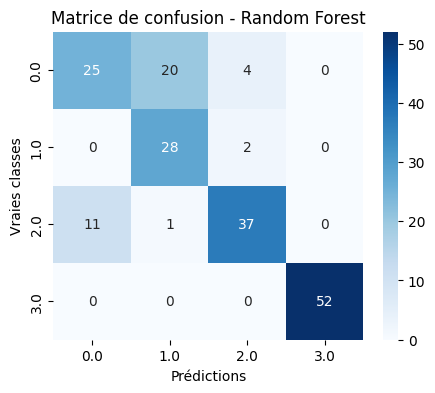

Random Forest - Accuracy: 0.7889 - F1 Score: 0.7861 - Temps d'exécution: 0.2958 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


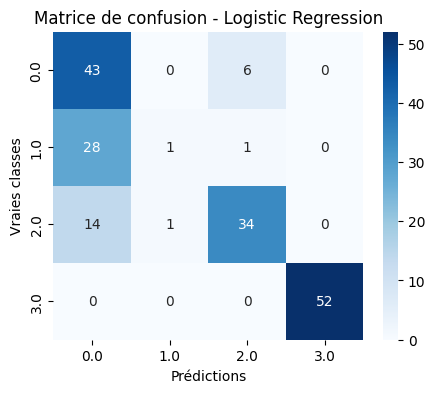

Logistic Regression - Accuracy: 0.7222 - F1 Score: 0.6797 - Temps d'exécution: 0.4709 sec
###################################################################

 Évaluation de SVC avec train_test_split...


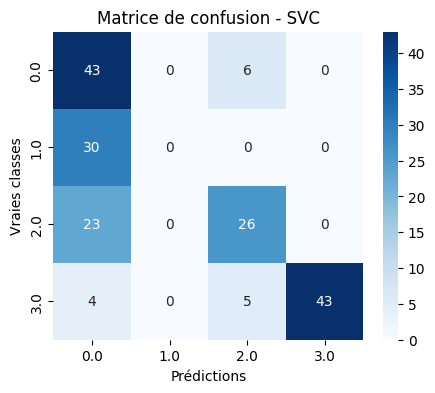

SVC - Accuracy: 0.6222 - F1 Score: 0.5832 - Temps d'exécution: 0.0341 sec
###################################################################

 Évaluation de KNN avec train_test_split...


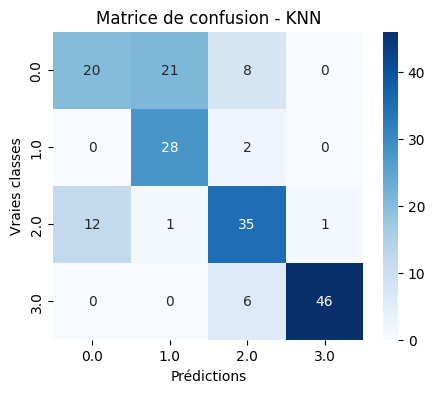

KNN - Accuracy: 0.7167 - F1 Score: 0.7101 - Temps d'exécution: 0.0321 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


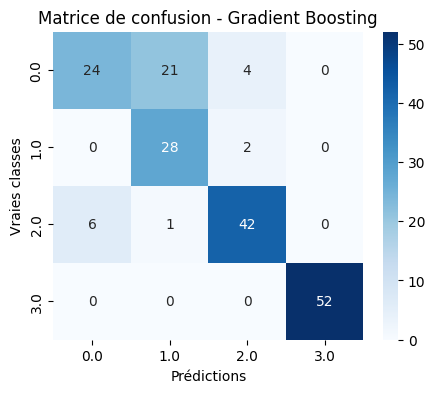

Gradient Boosting - Accuracy: 0.8111 - F1 Score: 0.8067 - Temps d'exécution: 1.9735 sec
###################################################################


In [19]:
"""
Prédiction du profil de  consommation de chauffage (24 heures) en fonction de Tint à Toulouse et ses périphéries :
- diminution du cluster 3 pour équilibrer les classes
- train/test split (test_size=0.2)

"""
X = Tint_conso_heat_tou.drop(columns=["clusters"])
y = Tint_conso_heat_tou["clusters"]
X_balanced, y_balanced = balance_clusters(X, y)
X_train,X_test,y_train,y_test=train_test_split(X_balanced,y_balanced,test_size=0.2, random_state=42)

results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)


 Évaluation de Random Forest avec train_test_split...


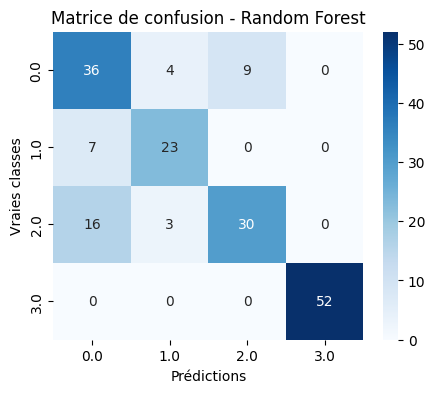

Random Forest - Accuracy: 0.7833 - F1 Score: 0.7838 - Temps d'exécution: 0.3734 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


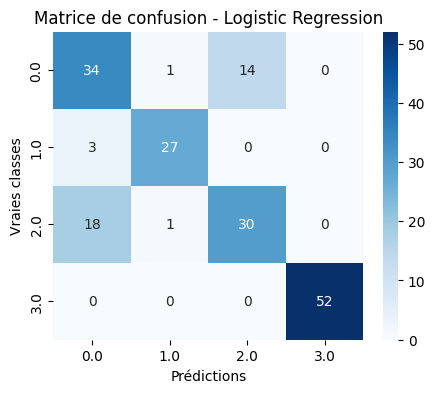

Logistic Regression - Accuracy: 0.7944 - F1 Score: 0.7950 - Temps d'exécution: 0.4093 sec
###################################################################

 Évaluation de SVC avec train_test_split...


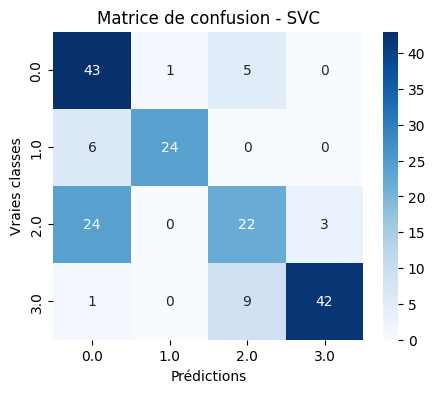

SVC - Accuracy: 0.7278 - F1 Score: 0.7269 - Temps d'exécution: 0.0427 sec
###################################################################

 Évaluation de KNN avec train_test_split...


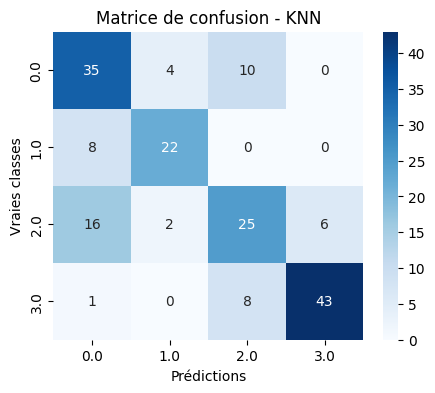

KNN - Accuracy: 0.6944 - F1 Score: 0.6952 - Temps d'exécution: 0.0112 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


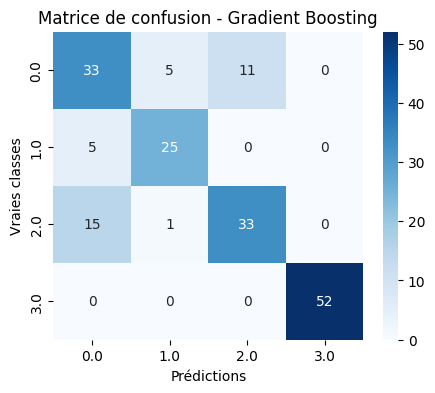

Gradient Boosting - Accuracy: 0.7944 - F1 Score: 0.7948 - Temps d'exécution: 2.6640 sec
###################################################################
****************************************************************************************************
****************************************************************************************************
****************************************************************************************************

 Évaluation de Random Forest avec Cross Validation (4-folds)...
Random Forest - Accuracy: 0.8630 - F1 Score: 0.8634 - Temps d'exécution: 3.3392 sec
###################################################################

 Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.8767 - F1 Score: 0.8769 - Temps d'exécution: 0.4088 sec
###################################################################

 Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.8555 - F1 Score: 0.856

In [18]:
"""
Prédiction du profil de  consommation de chauffage (24 heures) en fonction de TEXT à Toulouse et ses périphéries :
- diminution du cluster 3 pour équilibrer les classes
- train/test split
- cross-validation
"""
X = Text_conso_heat_tou.drop(columns=["clusters"])
y = Text_conso_heat_tou["clusters"]
X_balanced, y_balanced = balance_clusters(X, y)
X_train,X_test,y_train,y_test=train_test_split(X_balanced,y_balanced,test_size=0.2, random_state=42)
results_split = evaluate_models_split( X_train, X_test, y_train, y_test, models)
print("*"*100)
print("*"*100)
print("*"*100)
X_norm=standardize_data(X)
results_cv = evaluate_models_cv(X_norm, y, models, cv=4)


 Évaluation de Random Forest avec train_test_split...


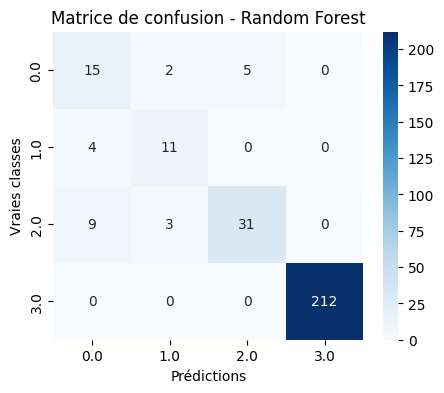

Random Forest - Accuracy: 0.9212 - F1 Score: 0.9233 - Temps d'exécution: 0.4527 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


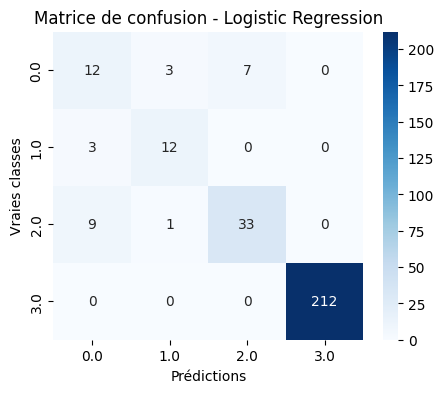

Logistic Regression - Accuracy: 0.9212 - F1 Score: 0.9222 - Temps d'exécution: 0.6324 sec
###################################################################

 Évaluation de SVC avec train_test_split...


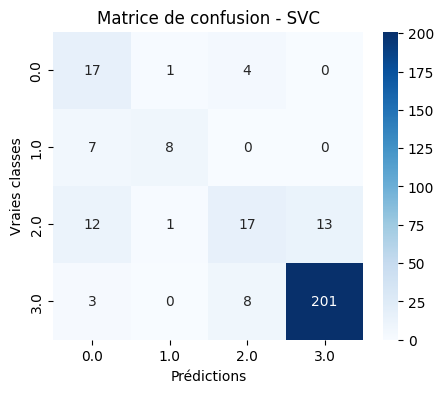

SVC - Accuracy: 0.8322 - F1 Score: 0.8295 - Temps d'exécution: 0.0648 sec
###################################################################

 Évaluation de KNN avec train_test_split...


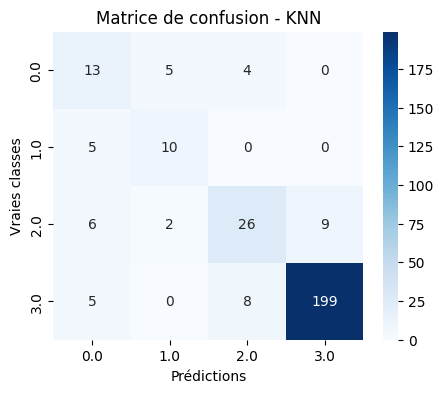

KNN - Accuracy: 0.8493 - F1 Score: 0.8531 - Temps d'exécution: 0.0362 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


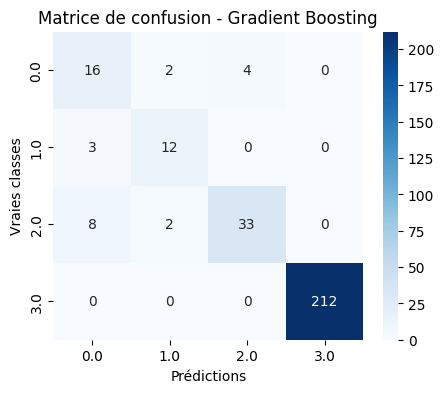

Gradient Boosting - Accuracy: 0.9349 - F1 Score: 0.9365 - Temps d'exécution: 3.9349 sec
###################################################################


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
"""
Prédiction du profil de  consommation de chauffage (24 heures) en fonction de TEXT à Toulouse et ses périphéries :
- train  first 80 %  et test sur  le rest
- Sauvegarder les prédictions dans un tableau pour l'utiliser après avec la prédiction
                 de 24 heures de consommation de chauffage comme donnée entrée de profil predit
"""

X = Text_conso_heat_tou.drop(columns=["clusters"])
y = Text_conso_heat_tou["clusters"]
X_train = X.iloc[:int((X.shape[0]*8)/10), :]
X_test = X.iloc[int((X.shape[0]*8)/10):, :]
y_train = y.iloc[:int((y.shape[0]*8)/10)]
y_test = y.iloc[int((y.shape[0]*8)/10):]
results_split = evaluate_models_split( X_train, X_test, y_train, y_test, models)


df_export = X_test.copy()
df_export['y_true'] = y_test.values  
for name, model in models.items():
    model.fit(X_train, y_train)                    
    y_pred = model.predict(X_test)                 
    df_export[f'y_pred_{name}'] = y_pred          
df_export.to_csv("../data/simulation_data/conso_kmeans_data/resultat_prediction_perif_toulouse_dernier_20%.csv", index=False)




 Évaluation de Random Forest avec train_test_split...


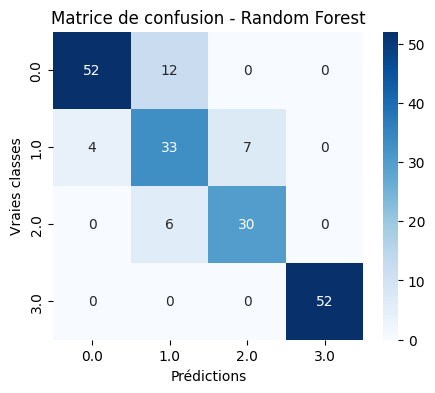

Random Forest - Accuracy: 0.8520 - F1 Score: 0.8552 - Temps d'exécution: 0.4180 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


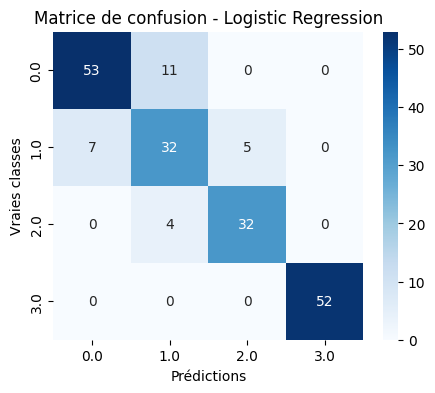

Logistic Regression - Accuracy: 0.8622 - F1 Score: 0.8633 - Temps d'exécution: 0.2499 sec
###################################################################

 Évaluation de SVC avec train_test_split...


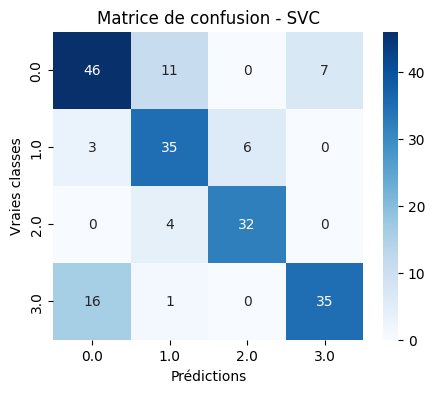

SVC - Accuracy: 0.7551 - F1 Score: 0.7547 - Temps d'exécution: 0.0312 sec
###################################################################

 Évaluation de KNN avec train_test_split...


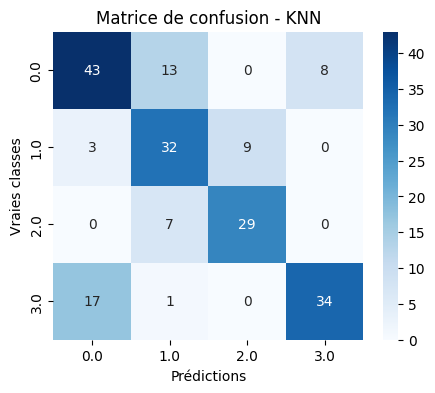

KNN - Accuracy: 0.7041 - F1 Score: 0.7051 - Temps d'exécution: 0.0156 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


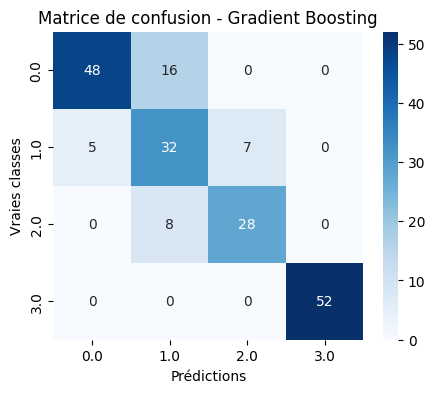

Gradient Boosting - Accuracy: 0.8163 - F1 Score: 0.8218 - Temps d'exécution: 3.0754 sec
###################################################################
****************************************************************************************************
****************************************************************************************************
****************************************************************************************************

 Évaluation de Random Forest avec Cross Validation (4-folds)...
Random Forest - Accuracy: 0.8925 - F1 Score: 0.8930 - Temps d'exécution: 3.5198 sec
###################################################################

 Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.9068 - F1 Score: 0.9070 - Temps d'exécution: 0.3514 sec
###################################################################

 Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.8932 - F1 Score: 0.894

In [8]:
"""
Prédiction du profil de  consommation de chauffage (24 heures) en fonction de TEXT à zurich et ses périphéries :
- diminution du cluster 3 pour équilibrer les classes
- train/test split
- cross-validation
"""

X = Text_conso_heat_zur.drop(columns=["clusters"])
y = Text_conso_heat_zur["clusters"]
X_balanced, y_balanced = balance_clusters(X, y)
X_train,X_test,y_train,y_test=train_test_split(X_balanced,y_balanced,test_size=0.2, random_state=42)
results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)
print("*"*100)
print("*"*100)
print("*"*100)
X_norm=standardize_data(X)
results_cv = evaluate_models_cv(X_norm, y, models, cv=4)


 Évaluation de Random Forest avec train_test_split...


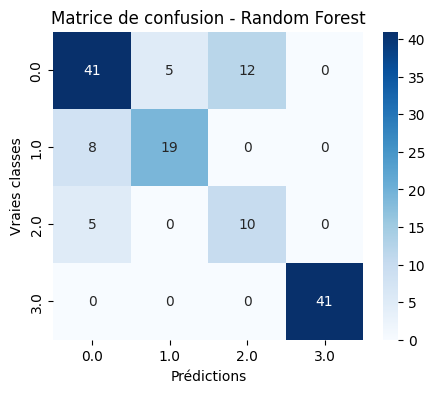

Random Forest - Accuracy: 0.7872 - F1 Score: 0.7921 - Temps d'exécution: 0.3568 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


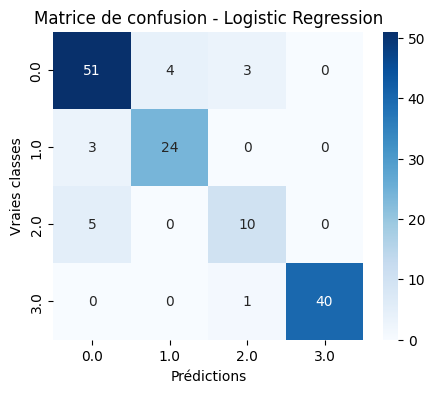

Logistic Regression - Accuracy: 0.8865 - F1 Score: 0.8863 - Temps d'exécution: 0.3955 sec
###################################################################

 Évaluation de SVC avec train_test_split...


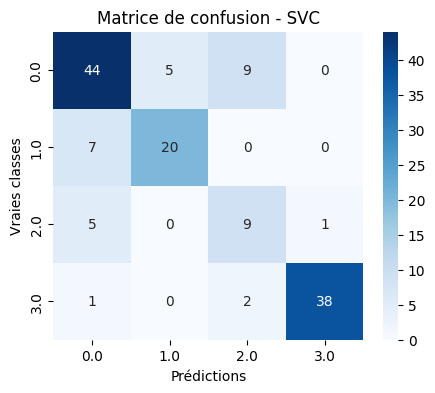

SVC - Accuracy: 0.7872 - F1 Score: 0.7930 - Temps d'exécution: 0.0275 sec
###################################################################

 Évaluation de KNN avec train_test_split...


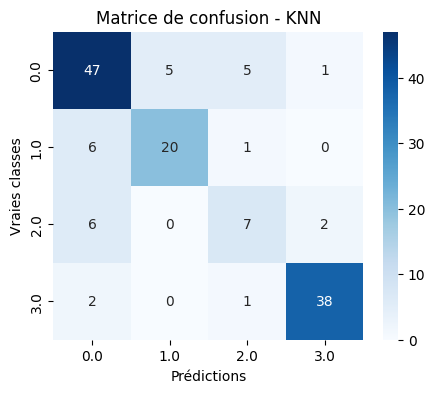

KNN - Accuracy: 0.7943 - F1 Score: 0.7931 - Temps d'exécution: 0.0352 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


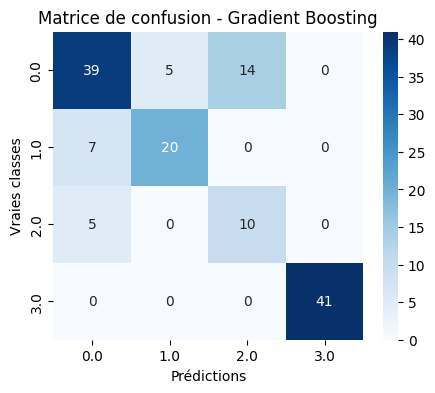

Gradient Boosting - Accuracy: 0.7801 - F1 Score: 0.7870 - Temps d'exécution: 2.3955 sec
###################################################################
****************************************************************************************************
****************************************************************************************************
****************************************************************************************************

 Évaluation de Random Forest avec Cross Validation (4-folds)...
Random Forest - Accuracy: 0.9075 - F1 Score: 0.9075 - Temps d'exécution: 3.3844 sec
###################################################################

 Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.9253 - F1 Score: 0.9252 - Temps d'exécution: 0.4398 sec
###################################################################

 Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.9062 - F1 Score: 0.906

In [9]:
"""
Prédiction du profil de  consommation de climatisation (24 heures) en fonction de TEXT à seville et ses périphéries :
- diminution du cluster 3 pour équilibrer les classes
- train/test split
- cross-validation
"""
X = Text_conso_cool_sev.drop(columns=["clusters"])
y = Text_conso_cool_sev["clusters"]
X_balanced, y_balanced = balance_clusters(X, y)
X_train,X_test,y_train,y_test=train_test_split(X_balanced,y_balanced,test_size=0.2, random_state=42)
results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)
print("*"*100)
print("*"*100)
print("*"*100)
X_norm=standardize_data(X)
results_cv = evaluate_models_cv(X_norm, y, models, cv=4)


 Évaluation de Random Forest avec train_test_split...


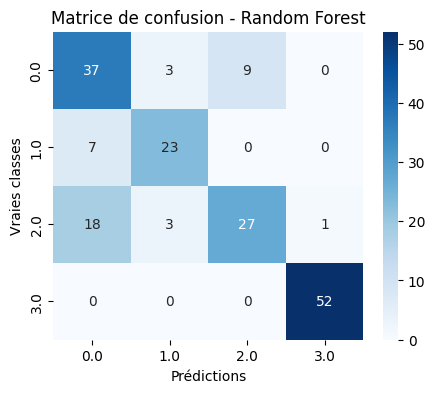

Random Forest - Accuracy: 0.7722 - F1 Score: 0.7705 - Temps d'exécution: 0.4042 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


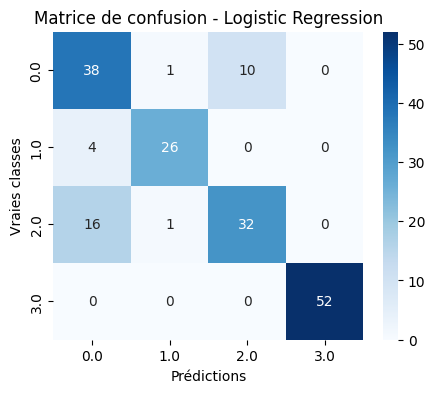

Logistic Regression - Accuracy: 0.8222 - F1 Score: 0.8231 - Temps d'exécution: 0.4385 sec
###################################################################

 Évaluation de SVC avec train_test_split...


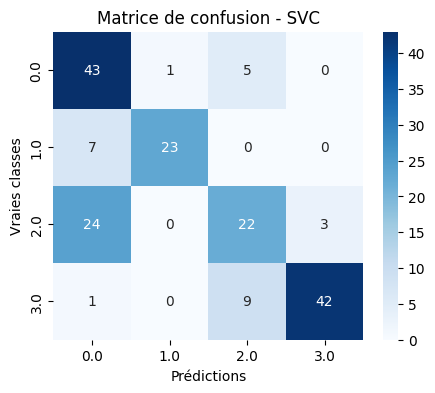

SVC - Accuracy: 0.7222 - F1 Score: 0.7219 - Temps d'exécution: 0.0421 sec
###################################################################

 Évaluation de KNN avec train_test_split...


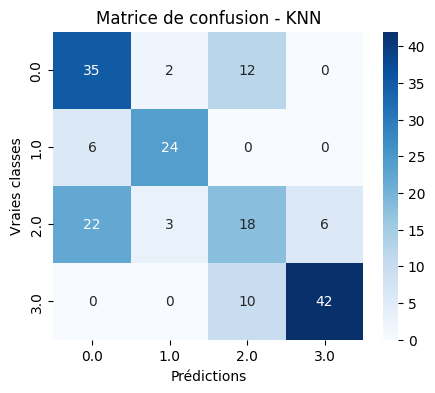

KNN - Accuracy: 0.6611 - F1 Score: 0.6585 - Temps d'exécution: 0.0209 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


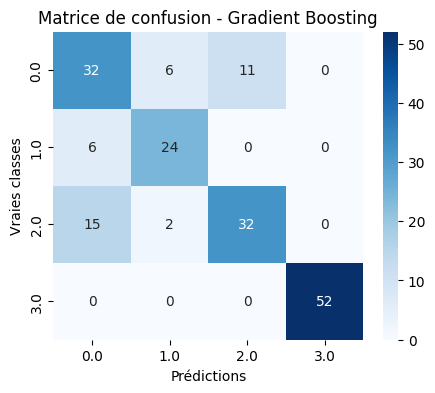

Gradient Boosting - Accuracy: 0.7778 - F1 Score: 0.7781 - Temps d'exécution: 3.0177 sec
###################################################################
****************************************************************************************************
****************************************************************************************************
****************************************************************************************************

 Évaluation de Random Forest avec Cross Validation (4-folds)...
Random Forest - Accuracy: 0.8603 - F1 Score: 0.8598 - Temps d'exécution: 3.6730 sec
###################################################################

 Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.8801 - F1 Score: 0.8804 - Temps d'exécution: 0.4866 sec
###################################################################

 Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.8575 - F1 Score: 0.858

In [10]:
"""
Prédiction du profil de  consommation de chauffage (24 heures) en fonction de TEXT et occupation à toulouse et ses périphéries :
- diminution du cluster 3 pour équilibrer les classes
- train/test split
- cross-validation
"""
X = Text_occ_conso_heat_tou.drop(columns=["clusters"])
y = Text_occ_conso_heat_tou["clusters"]
X_balanced, y_balanced = balance_clusters(X, y)
X_train,X_test,y_train,y_test=train_test_split(X_balanced,y_balanced,test_size=0.2, random_state=42)
results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)
print("*"*100)
print("*"*100)
print("*"*100)
X_norm=standardize_data(X)
results_cv = evaluate_models_cv(X_norm, y, models, cv=4)


 Évaluation de Random Forest avec train_test_split...


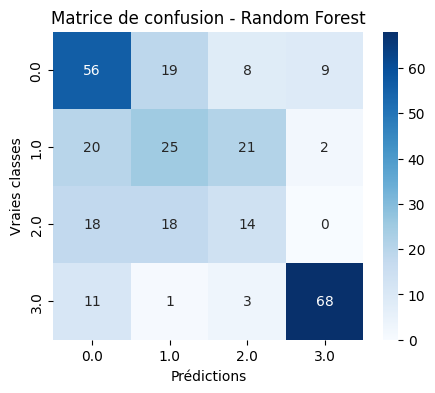

Random Forest - Accuracy: 0.5563 - F1 Score: 0.5547 - Temps d'exécution: 0.3575 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


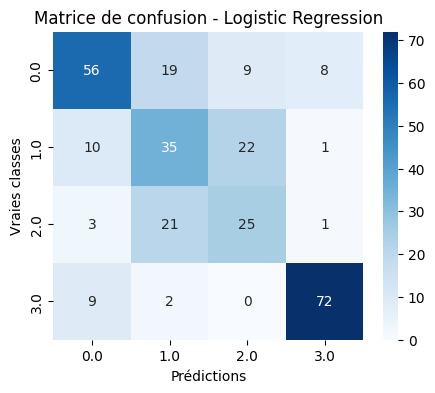

Logistic Regression - Accuracy: 0.6416 - F1 Score: 0.6466 - Temps d'exécution: 0.3908 sec
###################################################################

 Évaluation de SVC avec train_test_split...


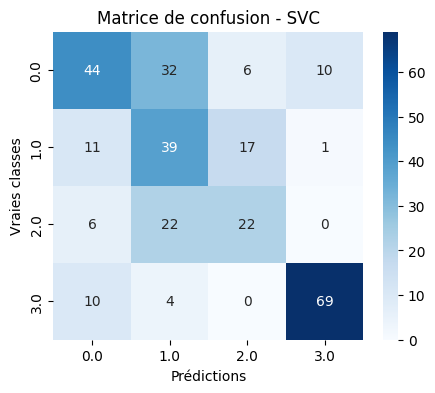

SVC - Accuracy: 0.5939 - F1 Score: 0.5981 - Temps d'exécution: 0.0312 sec
###################################################################

 Évaluation de KNN avec train_test_split...


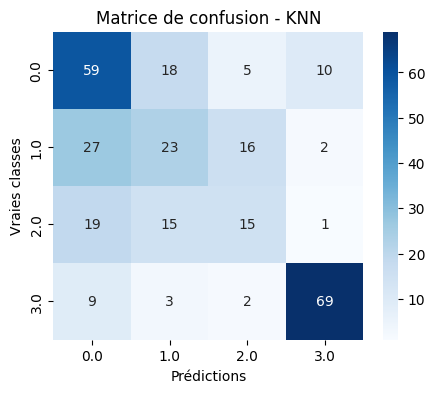

KNN - Accuracy: 0.5666 - F1 Score: 0.5590 - Temps d'exécution: 0.0312 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


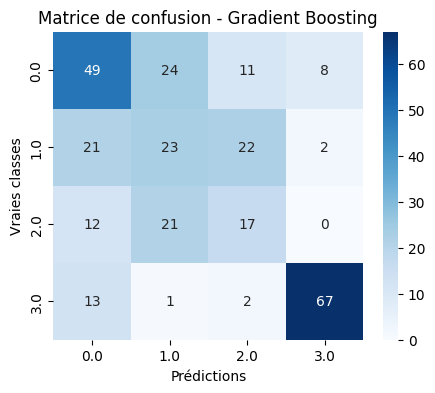

Gradient Boosting - Accuracy: 0.5324 - F1 Score: 0.5366 - Temps d'exécution: 2.3490 sec
###################################################################
****************************************************************************************************
****************************************************************************************************
****************************************************************************************************

 Évaluation de Random Forest avec Cross Validation (4-folds)...
Random Forest - Accuracy: 0.6767 - F1 Score: 0.6746 - Temps d'exécution: 3.2787 sec
###################################################################

 Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.7110 - F1 Score: 0.7045 - Temps d'exécution: 0.4374 sec
###################################################################

 Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.6884 - F1 Score: 0.682

In [11]:
"""
test negatif
Prédiction du profil de  consommation de chauffage a zurich (24 heures) en fonction de TEXT  à toulouse et ses périphéries :
- diminution du cluster 3 pour équilibrer les classes
- train/test split
- cross-validation
"""
Text_conso_sev_heat_tou=Text_combined_tou.copy()
Text_conso_sev_heat_tou['clusters'] = conso_zur['clusters']
Text_conso_sev_heat_tou.columns = Text_conso_sev_heat_tou.columns.astype(str)
X = Text_conso_sev_heat_tou.drop(columns=["clusters"])
y = Text_conso_sev_heat_tou["clusters"]

X_balanced, y_balanced = balance_clusters(X, y)
X_train,X_test,y_train,y_test=train_test_split(X_balanced,y_balanced,test_size=0.3, random_state=42)
results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)
print("*"*100)
print("*"*100)
print("*"*100)
X_norm=standardize_data(X)
results_cv = evaluate_models_cv(X_norm, y, models, cv=4)


 Évaluation de Random Forest avec train_test_split...


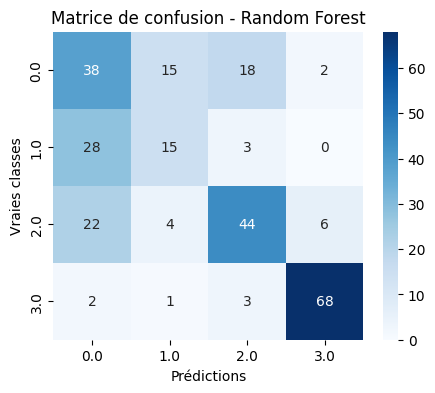

Random Forest - Accuracy: 0.6134 - F1 Score: 0.6119 - Temps d'exécution: 0.2622 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


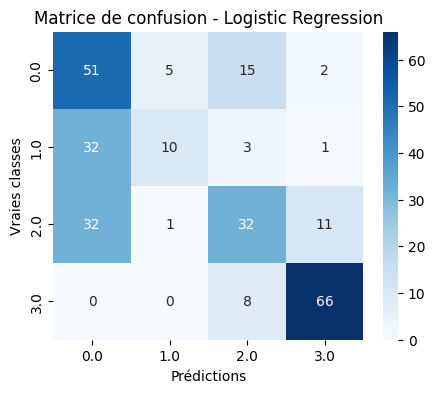

Logistic Regression - Accuracy: 0.5911 - F1 Score: 0.5731 - Temps d'exécution: 0.4113 sec
###################################################################

 Évaluation de SVC avec train_test_split...


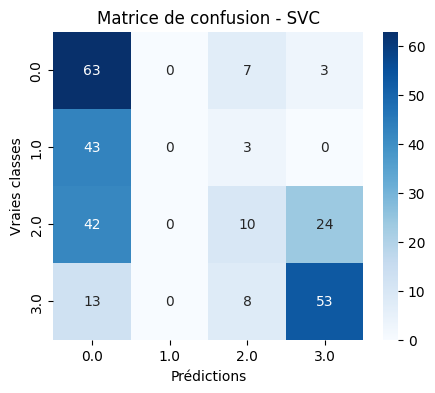

SVC - Accuracy: 0.4684 - F1 Score: 0.3898 - Temps d'exécution: 0.0313 sec
###################################################################

 Évaluation de KNN avec train_test_split...


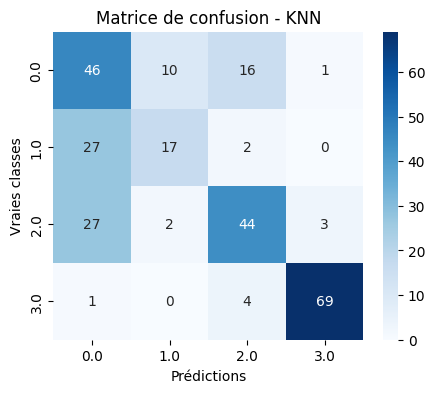

KNN - Accuracy: 0.6543 - F1 Score: 0.6543 - Temps d'exécution: 0.0156 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


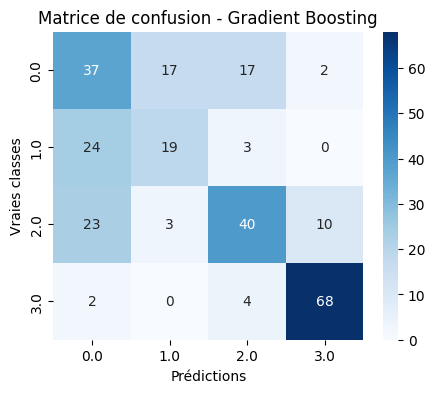

Gradient Boosting - Accuracy: 0.6097 - F1 Score: 0.6071 - Temps d'exécution: 1.6316 sec
###################################################################
****************************************************************************************************
****************************************************************************************************
****************************************************************************************************

 Évaluation de Random Forest avec Cross Validation (4-folds)...
Random Forest - Accuracy: 0.7349 - F1 Score: 0.7339 - Temps d'exécution: 2.5866 sec
###################################################################

 Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.7205 - F1 Score: 0.6621 - Temps d'exécution: 0.4019 sec
###################################################################

 Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.7192 - F1 Score: 0.654

In [12]:
"""
test negatif
Prédiction du profil de  consommation de chauffage a toulouse (24 heures) en fonction de solar angle   à zurich et ses périphéries :
- diminution du cluster 3 pour équilibrer les classes
- train/test split
- cross-validation
"""
Solar_conso_tou_heat_zur=Solar_combined_zur.copy()
Solar_conso_tou_heat_zur['clusters'] = conso_tou['clusters']
Solar_conso_tou_heat_zur.columns = Solar_conso_tou_heat_zur.columns.astype(str)
X = Solar_conso_tou_heat_zur.drop(columns=["clusters"])
y = Solar_conso_tou_heat_zur["clusters"]
X_balanced, y_balanced = balance_clusters(X, y)
X_train,X_test,y_train,y_test=train_test_split(X_balanced,y_balanced,test_size=0.3, random_state=42)
results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)
print("*"*100)
print("*"*100)
print("*"*100)
X_norm=standardize_data(X)
results_cv = evaluate_models_cv(X_norm, y, models, cv=4)


 Évaluation de Random Forest avec train_test_split...


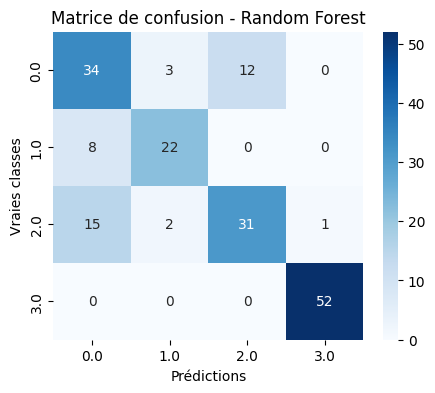

Random Forest - Accuracy: 0.7722 - F1 Score: 0.7729 - Temps d'exécution: 0.3248 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


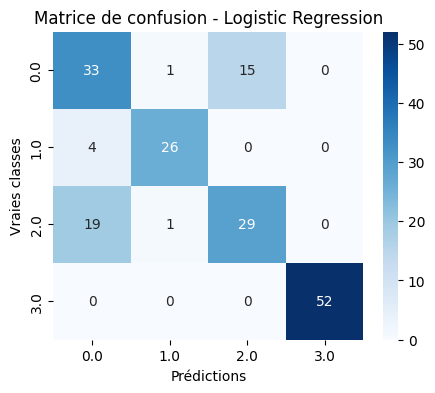

Logistic Regression - Accuracy: 0.7778 - F1 Score: 0.7792 - Temps d'exécution: 0.5087 sec
###################################################################

 Évaluation de SVC avec train_test_split...


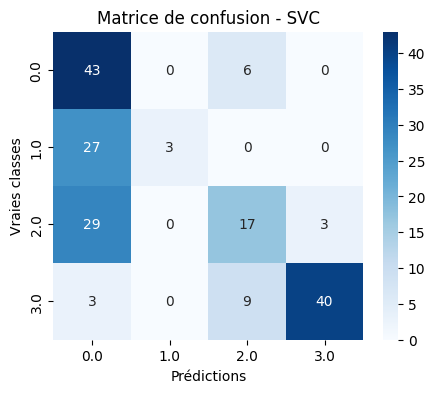

SVC - Accuracy: 0.5722 - F1 Score: 0.5429 - Temps d'exécution: 0.0469 sec
###################################################################

 Évaluation de KNN avec train_test_split...


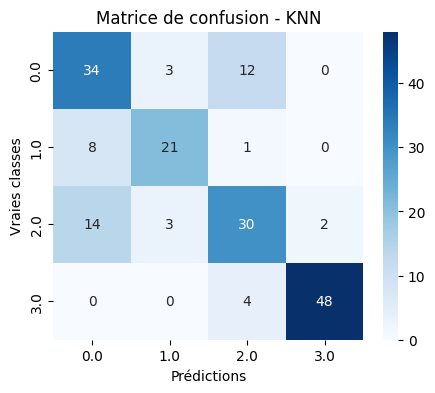

KNN - Accuracy: 0.7389 - F1 Score: 0.7411 - Temps d'exécution: 0.0156 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


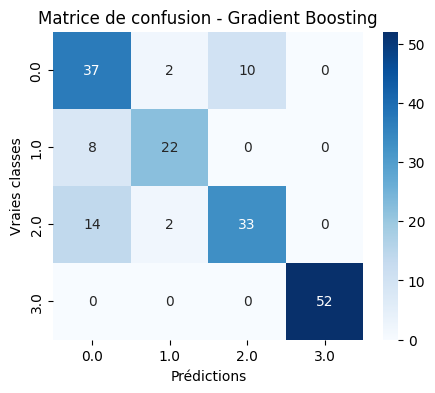

Gradient Boosting - Accuracy: 0.8000 - F1 Score: 0.8017 - Temps d'exécution: 3.9805 sec
###################################################################
****************************************************************************************************
****************************************************************************************************
****************************************************************************************************

 Évaluation de Random Forest avec Cross Validation (4-folds)...
Random Forest - Accuracy: 0.8596 - F1 Score: 0.8601 - Temps d'exécution: 3.0397 sec
###################################################################

 Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.8740 - F1 Score: 0.8746 - Temps d'exécution: 0.9877 sec
###################################################################

 Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.8610 - F1 Score: 0.861

In [13]:
"""
Prédiction du profil de  consommation de chauffage (24 heures) en fonction de TEXT , Wind , solar angle ,ground reflection 
à toulouse et ses périphéries :
- diminution du cluster 3 pour équilibrer les classes
- train/test split
- cross-validation
"""
X = Text_Wind_Solar_Ground_conso_heat_tou.drop(columns=["clusters"])
y = Text_Wind_Solar_Ground_conso_heat_tou["clusters"]
X_balanced, y_balanced = balance_clusters(X, y)
X_train,X_test,y_train,y_test=train_test_split(X_balanced,y_balanced,test_size=0.2, random_state=42)
results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)
print("*"*100)
print("*"*100)
print("*"*100)
X_norm=standardize_data(X)
results_cv = evaluate_models_cv(X_norm, y, models, cv=4)

In [14]:
"""
Ajout des 24 heures de température extérieure de T-1 aux 24 heures de T, pour chaque jour, à Toulouse et ses périphéries.
"""
n_rows = len(Text_conso_heat_tou) - 1
new_data = []
for i in range(1, n_rows + 1):  
    yesterday = Text_conso_heat_tou.iloc[i-1, :24].values 
    today = Text_conso_heat_tou.iloc[i, :24].values  
    heat_on_today = Text_conso_heat_tou.iloc[i, 24]  
    clusters_today = Text_conso_heat_tou.iloc[i, 25]  

    new_data.append(list(yesterday) + list(today) + [heat_on_today, clusters_today])


Text_conso_heat_tou_2days = pd.DataFrame(new_data, columns=[*range(48), "heat_on", "clusters"])
Text_conso_heat_tou_2days.columns = Text_conso_heat_tou_2days.columns.astype(str)




 Évaluation de Random Forest avec train_test_split...


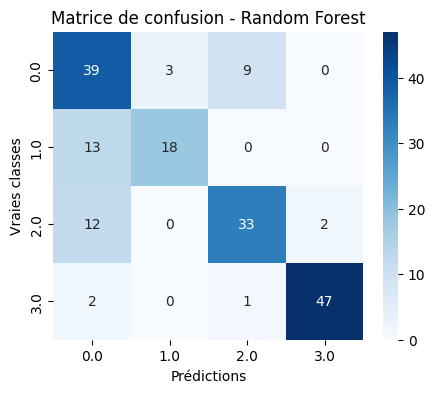

Random Forest - Accuracy: 0.7654 - F1 Score: 0.7676 - Temps d'exécution: 0.5270 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


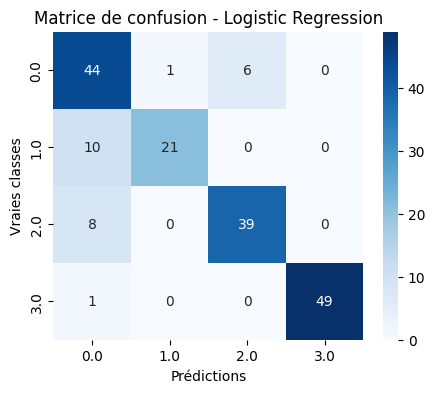

Logistic Regression - Accuracy: 0.8547 - F1 Score: 0.8563 - Temps d'exécution: 0.5467 sec
###################################################################

 Évaluation de SVC avec train_test_split...


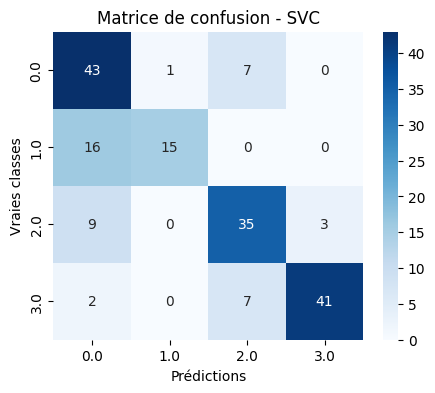

SVC - Accuracy: 0.7486 - F1 Score: 0.7482 - Temps d'exécution: 0.0259 sec
###################################################################

 Évaluation de KNN avec train_test_split...


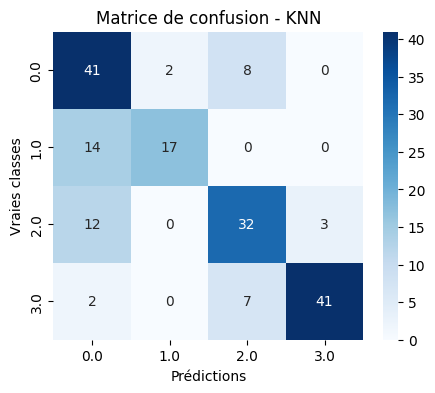

KNN - Accuracy: 0.7318 - F1 Score: 0.7349 - Temps d'exécution: 0.0312 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


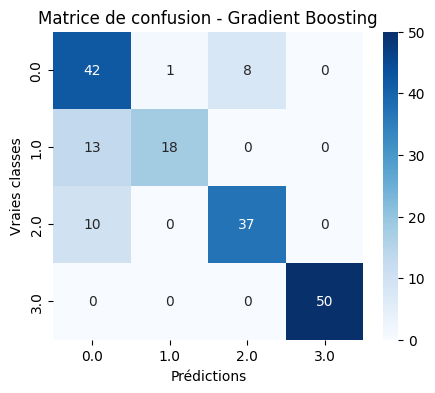

Gradient Boosting - Accuracy: 0.8212 - F1 Score: 0.8215 - Temps d'exécution: 5.4973 sec
###################################################################
****************************************************************************************************
****************************************************************************************************
****************************************************************************************************

 Évaluation de Random Forest avec Cross Validation (4-folds)...
Random Forest - Accuracy: 0.9040 - F1 Score: 0.9043 - Temps d'exécution: 5.1037 sec
###################################################################

 Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.9212 - F1 Score: 0.9210 - Temps d'exécution: 0.5159 sec
###################################################################

 Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.9075 - F1 Score: 0.907

In [15]:
"""
Prédiction du profil de  consommation de chauffage (24 heures) en fonction de TEXT de ( T et T-1 ) 48 heures 
à toulouse et ses périphéries :
- diminution du cluster 3 pour équilibrer les classes
- train/test split
- cross-validation
"""

X = Text_conso_heat_tou_2days.drop(columns=["clusters"])
y = Text_conso_heat_tou_2days["clusters"]
X_balanced, y_balanced = balance_clusters(X, y)

X_train,X_test,y_train,y_test=train_test_split(X_balanced, y_balanced,test_size=0.2, random_state=42)
results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)
print("*"*100)
print("*"*100)
print("*"*100)
X_norm=standardize_data(X)
results_cv = evaluate_models_cv(X_norm, y, models, cv=4)